In [1]:
# -*- coding: utf-8 -*-
# -*- authors : Vincent Roduit, Filippo Quadri -*-
# -*- date : 2024-05-03 -*-
# -*- Last revision: 2024-05-03 -*-
# -*- python version : 3.9.18 -*-
# -*- Description: Notebook that summarize results-*-

# <center> EE - 451 Image Analysis and Pattern recognition </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Coin Challenge </center>
---

In [1]:
#Import libraries
import os
import numpy as np
import torch
import importlib
import skimage as sk
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from typing import Callable
import cv2 as cv
from skimage.morphology import closing, opening, disk, remove_small_holes, remove_small_objects
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#Import files
from data_classes.ref_data import refCoin
from data_classes.train_data import trainCoin
from data_classes.test_data import testCoin
import constants
from visualization import *
importlib.reload(constants)
from processing.process_func import *

%load_ext autoreload
%autoreload 2

# 1. Load different Datasets

In [3]:
ref_data = refCoin()

Loading data from pickle files


In [4]:
train_data = trainCoin()

Loading data from pickle files


In [5]:
test_data = testCoin()

Loading data from pickle files


In [261]:
from bullshit import *

In [275]:
from copy import deepcopy
imgs = deepcopy(train_data.raw_data['noisy_bg'])
imgs_array = np.array(imgs)

imgs_mean = np.mean(imgs_array, axis=0)
imgs_mean = imgs_mean.astype(np.uint8)

for idx, img in enumerate(imgs_array):
    img = img.astype(np.uint8)
    img = img - imgs_mean
    img_thresholded = apply_rgb_threshold(img, 70, 100, 0)
    img_opening = closing(img_thresholded, disk(2))
    img_removed_small_holes = remove_small_holes(img_opening, 1000)
    
    # Create a figure without displaying it
    plt.figure()
    
    # Plot the image
    plt.imshow(img_removed_small_holes, interpolation='nearest', cmap='gray')
    
    # Save the figure directly without displaying it
    plt.savefig(f'../data/results/noisy/img_{idx}.png')
    
    # Close the figure to free up memory
    plt.close()

/var/folders/s1/42fm0bb102l1htv_jw4lwy6m0000gn/T/ipykernel_3431/1911312561.py:13: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_removed_small_holes = remove_small_holes(img_opening, 1000)


/var/folders/s1/42fm0bb102l1htv_jw4lwy6m0000gn/T/ipykernel_3431/3337675898.py:16: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_removed_small_holes = remove_small_holes(img_opening, 1000)


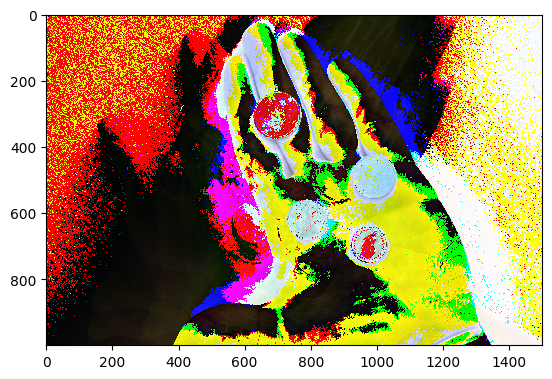

In [278]:
imgs = deepcopy(train_data.raw_data['hand'])
imgs_array = np.array(imgs)
path = '../data/results/hand'
if not os.path.exists(path):
    os.makedirs(path)

imgs_mean = np.mean(imgs_array, axis=0)
imgs_mean = imgs_mean.astype(np.uint8)

for idx, img in enumerate(imgs_array):
    img = img.astype(np.uint8)
    img = img - imgs_mean
    img_thresholded = apply_rgb_threshold(img, 70, 100, 0)
    plt.imshow(img, interpolation='nearest', cmap='gray')
    img_opening = closing(img_thresholded, disk(2))
    img_removed_small_holes = remove_small_holes(img_opening, 1000)
    
    # Create a figure without displaying it
    plt.figure()
    
    # Plot the image
    plt.imshow(img_removed_small_holes, interpolation='nearest', cmap='gray')
    
    # Save the figure directly without displaying it
    plt.savefig(f'../data/results/hand/img_{idx}.png')
    
    # Close the figure to free up memory
    plt.close()

neutral_bg_outliers


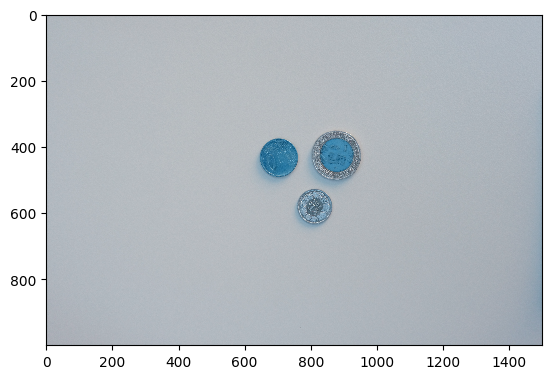

[172.0647238  180.35567392 187.747686  ]
[19.38904455 12.24009217  8.45810717]
hand


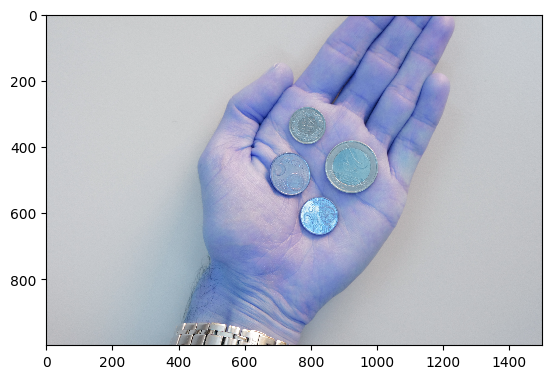

[174.7437968  180.12641227 197.68275993]
[31.79598338 25.79957635 12.49939394]
noisy_bg


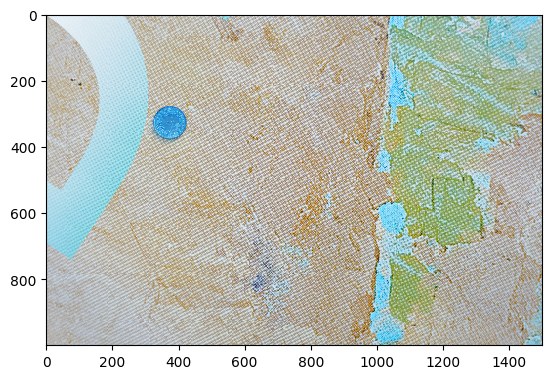

[174.3140692  184.94057782 177.2608792 ]
[31.76243664 25.10443921 39.40904942]
noisy_bg_outliers


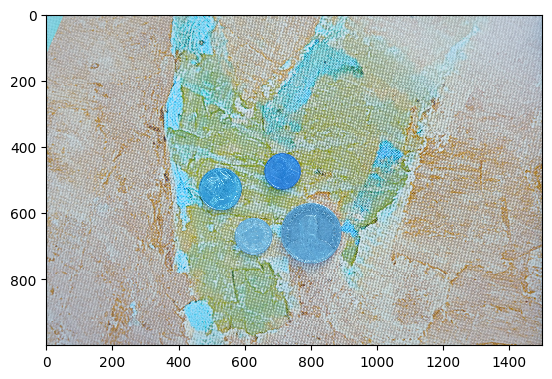

[166.39596367 179.244259   171.99350204]
[33.07523723 24.38534639 36.96427613]
hand_outliers


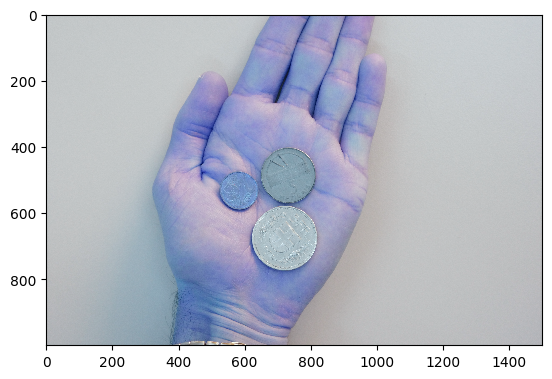

[170.6735159  175.7502421  189.71992857]
[30.54822374 25.62378735 14.72182393]
neutral_bg


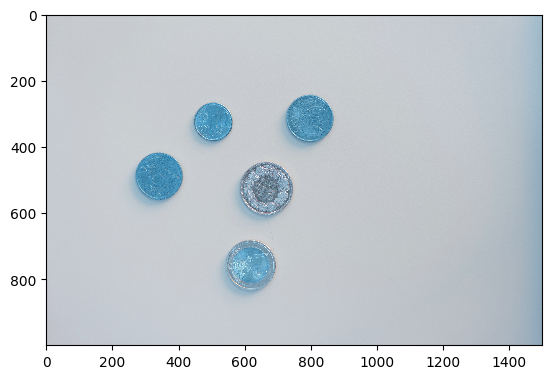

[188.11207929 196.09115525 202.82397158]
[24.83062015 15.244528    9.71413611]


In [300]:
means = []
stds = []
for type in train_data.raw_data:
    print(type)
    imgs = train_data.raw_data[type]
    plt.imshow(imgs[0], interpolation='nearest', cmap='gray')
    plt.show()
    imgs_array = np.array(imgs)
    imgs_mean = np.mean(imgs_array, axis=(0, 1, 2))
    imgs_std = np.std(imgs_array, axis=(0, 1, 2))
    print(imgs_mean)
    print(imgs_std)
    means.append(imgs_mean)
    stds.append(imgs_std)